<a href="https://colab.research.google.com/github/Binaaa04/DataScience_Intern/blob/main/Data_Sains_Modul8_Sabrina_Rahmadini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET AUTO-MPG**

**Narasi Dataset**

Dataset yang digunakan adalah Auto MPG Dataset, yaitu data tentang efisiensi bahan bakar (miles per gallon/mpg) dari berbagai mobil. Tujuan analisis ini adalah untuk memprediksi nilai mpg berdasarkan beberapa variabel lain seperti cylinders, displacement, horsepower, weight, acceleration, dan model_year. Secara umum, dataset ini sering digunakan untuk memahami hubungan antara karakteristik mobil dan tingkat efisiensinya dalam penggunaan bahan bakar.

In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/mpg.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


/tmp/ipython-input-3217906962.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


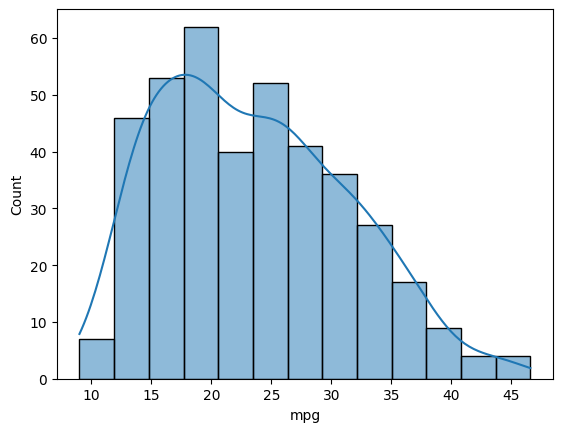

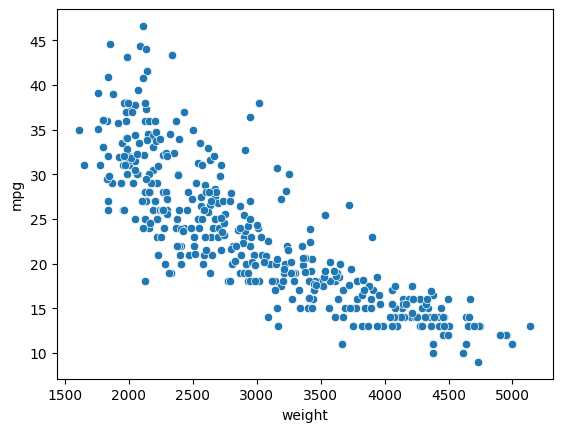

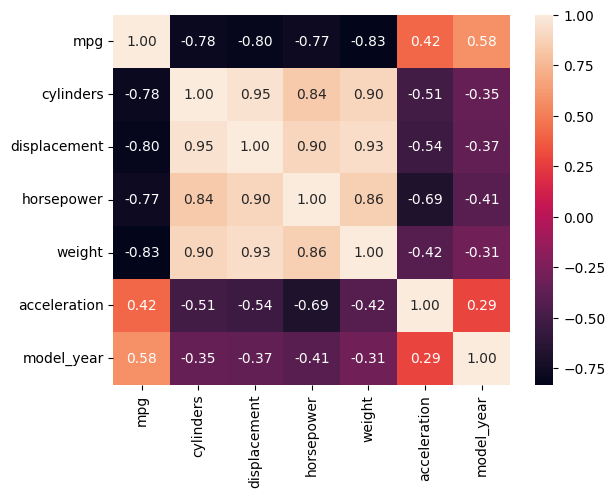

Linear R2: 0.8449096332762084 RMSE: 2.887673367716926
Ridge R2: 0.8449139611648633 RMSE: 2.8876330763169498
RandomForest R2: 0.9140271942385998 RMSE: 2.1499888429943073
 
Linear CV R2 mean: 0.5943996213998671
Ridge CV R2 mean: 0.5928581874824019
RandomForest CV R2 mean: 0.7610103877571988


In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 1. Baca dataset
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/mpg.csv')

# 2. Isi nilai kosong di horsepower
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# 3. Ubah kolom kategorikal menjadi angka
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# 4. Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['mpg', 'name'])
y = df['mpg']

# 5. Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standarisasi (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sns.histplot(df['mpg'], kde=True)
plt.show()

sns.scatterplot(x='weight', y='mpg', data=df)
plt.show()

sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.show()


models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'r2': r2, 'rmse': rmse}
    print(name, 'R2:', r2, 'RMSE:', rmse)
print(' ')

for name, model in models.items():
    scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='r2')
    print(name, 'CV R2 mean:', np.mean(scores))


Dataset :
https://www.kaggle.com/datasets/emirhanai/emotion-prediction-with-semi-supervised-learning

**Narasi Dataset**


In [13]:
!pip install -q transformers datasets evaluate accelerate seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00


In [15]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/tweet_emotions.csv')
print(df.shape)
display(df.head())
print(df.columns)
print(df['sentiment'].value_counts())


(40000, 3)


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Index(['tweet_id', 'sentiment', 'content'], dtype='object')
sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64


In [19]:
import pandas as pd
import re

df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/tweet_emotions.csv')
def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+', '', s)       # hapus URL
    s = re.sub(r'@\w+', '', s)          # hapus mention
    s = re.sub(r'#', '', s)             # hapus tanda # tetapi biarkan kata
    s = re.sub(r'\s+', ' ', s).strip()  # normalisasi spasi
    return s

df['text_clean'] = df['content'].apply(clean_text)

# cek null atau empty setelah cleaning
print("kosong:", df['text_clean'].isnull().sum(), "panjang rata-rata:", df['text_clean'].str.len().mean())

kosong: 0 panjang rata-rata: 65.725375


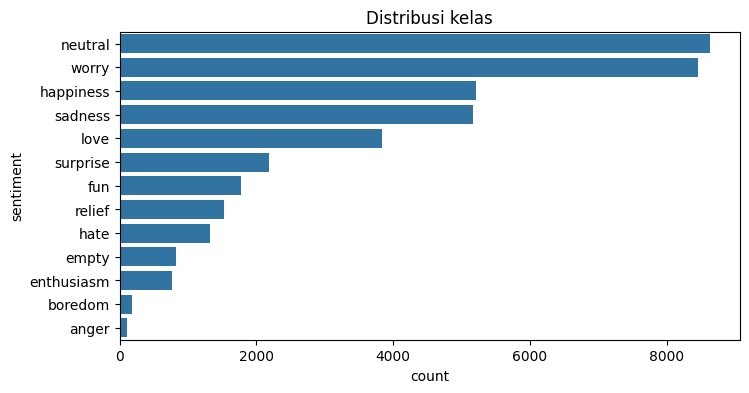

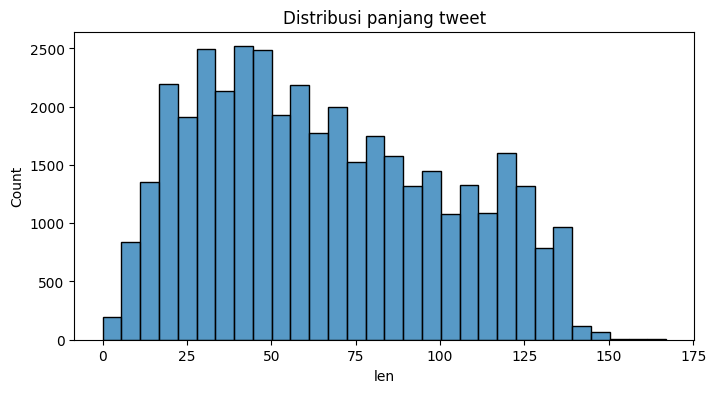

[('i', 3026), ('to', 2022), ('the', 1731), ('my', 1263), ('a', 1184), ('and', 1052), ('is', 829), ('in', 749), ('it', 649), ('you', 631)]
[]


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/tweet_emotions.csv')
def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+', '', s)       # hapus URL
    s = re.sub(r'@\w+', '', s)          # hapus mention
    s = re.sub(r'#', '', s)             # hapus tanda # tetapi biarkan kata
    s = re.sub(r'\s+', ' ', s).strip()  # normalisasi spasi
    return s

df['text_clean'] = df['content'].apply(clean_text)

plt.figure(figsize=(8,4))
sns.countplot(y='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.title("Distribusi kelas")
plt.show()

# panjang teks
df['len'] = df['text_clean'].str.len()
df['len'].describe()

plt.figure(figsize=(8,4))
sns.histplot(df['len'], bins=30)
plt.title("Distribusi panjang tweet")
plt.show()

def top_words_for_label(sentiment, n=20):
    texts = df[df['sentiment']==sentiment]['text_clean'].str.lower().str.split()
    cnt = Counter(itertools.chain.from_iterable(texts))
    return cnt.most_common(n)

print(top_words_for_label('sadness', 10))
print(top_words_for_label('joy', 10))

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from datasets import Dataset
from sklearn.model_selection import train_test_split
from datasets import DatasetDict

df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/tweet_emotions.csv')
def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+', '', s)       # hapus URL
    s = re.sub(r'@\w+', '', s)          # hapus mention
    s = re.sub(r'#', '', s)             # hapus tanda # tetapi biarkan kata
    s = re.sub(r'\s+', ' ', s).strip()  # normalisasi spasi
    return s

df['text_clean'] = df['content'].apply(clean_text)
df_small = df[['text_clean','sentiment']].rename(columns={'text_clean':'content'})

train_df, test_df = train_test_split(df_small, test_size=0.2, stratify=df_small['sentiment'], random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)
dataset = DatasetDict({'train': train_ds, 'test': test_ds})

print(dataset)


DatasetDict({
    train: Dataset({
        features: ['content', 'sentiment'],
        num_rows: 32000
    })
    test: Dataset({
        features: ['content', 'sentiment'],
        num_rows: 8000
    })
})


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from datasets import Dataset
from sklearn.model_selection import train_test_split
from datasets import DatasetDict
from transformers import AutoTokenizer

df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/tweet_emotions.csv')
def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+', '', s)       # hapus URL
    s = re.sub(r'@\w+', '', s)          # hapus mention
    s = re.sub(r'#', '', s)             # hapus tanda # tetapi biarkan kata
    s = re.sub(r'\s+', ' ', s).strip()  # normalisasi spasi
    return s

df['text_clean'] = df['content'].apply(clean_text)
df_small = df[['text_clean','sentiment']].rename(columns={'text_clean':'content'})

train_df, test_df = train_test_split(df_small, test_size=0.2, stratify=df_small['sentiment'], random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)
dataset = DatasetDict({'train': train_ds, 'test': test_ds})
model_name = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_function(batch):
    return tokenizer(batch['content'], padding='max_length', truncation=True, max_length=128)

tokenized = dataset.map(preprocess_function, batched=True)
tokenized = tokenized.remove_columns(['content'])  # optional
tokenized = tokenized.rename_column('sentiment', 'labels')
tokenized.set_format('torch')
print(train_df['sentiment'].value_counts())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

sentiment
neutral       6910
worry         6767
happiness     4167
sadness       4132
love          3074
surprise      1750
fun           1421
relief        1221
hate          1058
empty          662
enthusiasm     607
boredom        143
anger           88
Name: count, dtype: int64


In [2]:
!pip install evaluate datasets transformers accelerate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.4 MB/s eta 0:00:00


Kolom dataset: Index(['tweet_id', 'sentiment', 'content'], dtype='object')
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

Label mapping (label -> id):
{'anger': 0, 'boredom': 1, 'empty': 2, 'enthusiasm': 3, 'fun': 4, 'happiness': 5, 'hate': 6, 'love': 7, 'neutral': 8, 'relief': 9, 'sadness': 10, 'surprise': 11, 'worry': 12}
DatasetDict({
    train: Dataset({
        features: ['content', 'label_id'],
        num_rows: 32000
    })
    test: Dataset({
        features: ['content', 'label_id'],
        num_rows: 8000
    })
})


Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2829626802.py:144: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,1.799700,1.773201,0.393125,0.185399
2,1.715700,1.766750,0.397375,0.220227
3,1.434800,1.824223,0.388250,0.215034



=== EVALUATION METRICS ===
{'eval_loss': 1.7667502164840698, 'eval_accuracy': 0.397375, 'eval_f1_macro': 0.22022668155639222, 'eval_runtime': 29.14, 'eval_samples_per_second': 274.537, 'eval_steps_per_second': 17.159, 'epoch': 3.0}

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        22
     boredom       0.00      0.00      0.00        36
       empty       0.00      0.00      0.00       165
  enthusiasm       0.00      0.00      0.00       152
         fun       0.20      0.07      0.11       355
   happiness       0.35      0.51      0.41      1042
        hate       0.37      0.34      0.36       265
        love       0.49      0.46      0.48       768
     neutral       0.44      0.52      0.48      1728
      relief       0.24      0.07      0.11       305
     sadness       0.35      0.35      0.35      1033
    surprise       0.34      0.08      0.12       437
       worry       0.41      0.50

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


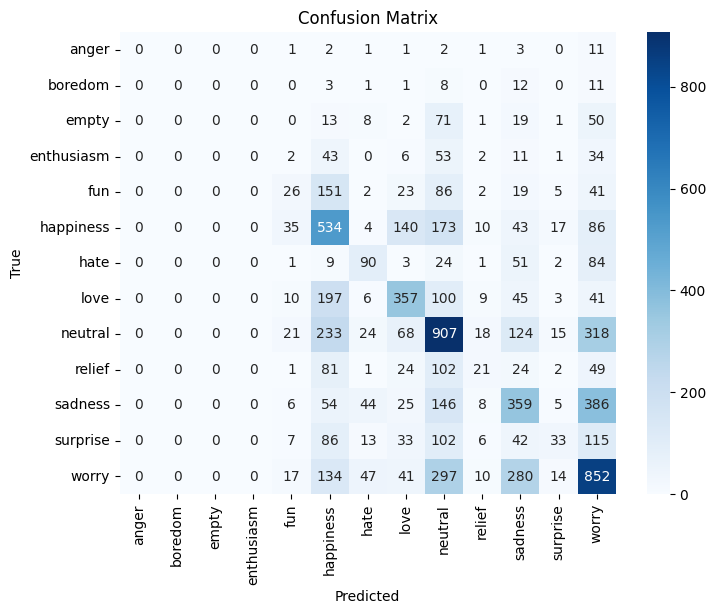

Model device: cuda:0

Prediksi teks: I am so happy today!
Emosi terdeteksi: happiness


In [7]:
# ===============================================
# STEP 1: Imports
# ===============================================
import re
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import evaluate
from collections import Counter
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)

# Disable wandb logging to avoid API prompt
os.environ["WANDB_DISABLED"] = "true"

# ===============================================
# STEP 2: Load dataset - ganti path sesuai file kamu
# ===============================================
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/tweet_emotions.csv')
print("Kolom dataset:", df.columns)
print(df.head())

# Pastikan kolom ada: 'content' dan 'sentiment'
# jika namanya beda, sesuaikan

# ===============================================
# STEP 3: Preprocessing teks ringan
# ===============================================
def clean_text(s):
    s = str(s)
    s = re.sub(r'http\S+', '', s)       # hapus URL
    s = re.sub(r'@\w+', '', s)          # hapus mention
    s = re.sub(r'#', '', s)             # hapus tanda #
    s = re.sub(r'\s+', ' ', s).strip()  # normalisasi spasi
    return s

df['text_clean'] = df['content'].apply(clean_text)

# ===============================================
# STEP 4: Mapping label teks -> integer
# ===============================================
# Gunakan sorted unique agar deterministic urutan label (rapi di laporan)
unique_labels = sorted(df['sentiment'].unique())
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}

df_small = df[['text_clean', 'sentiment']].rename(columns={'text_clean': 'content'})
df_small['label_id'] = df_small['sentiment'].map(label2id)

print("\nLabel mapping (label -> id):")
print(label2id)

# ===============================================
# STEP 5: Train/Test split (stratified)
# ===============================================
train_df, test_df = train_test_split(
    df_small[['content', 'label_id']],
    test_size=0.2,
    stratify=df_small['label_id'],
    random_state=42
)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)
dataset = DatasetDict({'train': train_ds, 'test': test_ds})
print(dataset)

# ===============================================
# STEP 6: Tokenizer & preprocessing
# ===============================================
# pilih model ringan untuk Colab (DistilBERT lebih kecil dari BERT)
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_function(batch):
    return tokenizer(batch['content'], padding='max_length', truncation=True, max_length=128)

tokenized = dataset.map(preprocess_function, batched=True)
# hapus kolom teks asli supaya Trainer hanya lihat input + labels
tokenized = tokenized.remove_columns(['content'])
# rename kolom label_id -> labels (konvensi Trainer)
tokenized = tokenized.rename_column('label_id', 'labels')
tokenized.set_format('torch')

# ===============================================
# STEP 7: Load model (sesuaikan num_labels)
# ===============================================
num_labels = len(label2id)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

# ===============================================
# STEP 8: Metrics
# ===============================================
metric_acc = evaluate.load("accuracy")
metric_f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": metric_acc.compute(predictions=preds, references=labels)['accuracy'],
        "f1_macro": metric_f1.compute(predictions=preds, references=labels, average='macro')['f1']
    }

# ===============================================
# STEP 9: Training arguments
# ===============================================
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,   # lebih aman untuk GPU Colab gratis
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    logging_steps=50,
    save_total_limit=2,
    report_to="none"  # disable logging services
)

# ===============================================
# STEP 10: Trainer & training
# ===============================================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized['train'],
    eval_dataset=tokenized['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

# ===============================================
# STEP 11: Evaluate on test set
# ===============================================
metrics = trainer.evaluate()
print("\n=== EVALUATION METRICS ===")
print(metrics)

preds_output = trainer.predict(tokenized['test'])
y_pred = np.argmax(preds_output.predictions, axis=-1)
y_true = preds_output.label_ids

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred, target_names=unique_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ===============================================
# STEP 12: Save model & tokenizer
# ===============================================
trainer.save_model("best_tweet_emotion_model")
tokenizer.save_pretrained("best_tweet_emotion_model")

# ===============================================
# STEP 13: Inference - PENTING: pindahkan inputs ke device model
# ===============================================
# Pastikan model ada di device (Trainer biasanya memindahkan model ke GPU)
device = next(model.parameters()).device
print("Model device:", device)

text = "I am so happy today!"
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

# Pindahkan semua tensor input ke device yang sama dengan model
inputs = {k: v.to(device) for k, v in inputs.items()}

model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    pred = outputs.logits.argmax(-1).item()

print("\nPrediksi teks:", text)
print("Emosi terdeteksi:", id2label[pred])